# Stock Price Vs Stock Google Searches

## Introduction:

This notebook is to explore the relation that search interest in a stock ticker has to do with the historical information for that stock. The data will be taken from historical stock data provided from Yahoo Finance and from search interest data gathered from Google Trends. For the purposes of this project I will only be looking at the level of search interest by observing the level of searches for the stocks ticker symbol. I will explore whether there is correlation between the absolute percent change in the stock and search interest in a stock. I will aslo explore whether there is correlation between stock trading volume and search interest in a stock. Data for the last 5 years is gathered to get the most accurate results.

#### Imports:

In [1]:
# To use dataframes & view csv file from google
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

# To get data from yahoo
import pandas_datareader as pdr

# To get search data from google
import pytrends
from pytrends.request import TrendReq

# To find linear regression equation
import statsmodels.formula.api as sm

#### Retrieving data from Yahoo Finance:

Retrieved 5 year daily historical stock data from Yahoo.

In [2]:
stock_list = ['PRPL','TSLA','GOOG']

end = datetime.now()
start = datetime(end.year - 5,end.month,end.day)

# Retrieve the data. Each stock historical data stored under dataframe object named under stock ticker
for stock in stock_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

#### Viewing Stock Data

In [3]:
PRPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,9.79,9.56,9.62,9.66,10700,9.66
2016-01-05,9.66,9.66,9.66,9.66,0,9.66
2016-01-06,9.66,9.66,9.66,9.66,0,9.66
2016-01-07,9.66,9.66,9.66,9.66,0,9.66
2016-01-08,9.66,9.66,9.66,9.66,0,9.66


#### Plotting Stock Closing Price Over Time:

Text(0, 0.5, 'Closing Price')

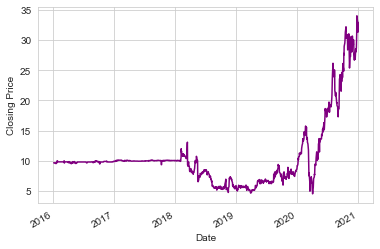

In [4]:
PRPL['Close'].plot(color = ('purple'))
plt.xlabel('Date')
plt.ylabel('Closing Price')

#### Function to convert daily stock data to weekly:

Function created to easily convert daily stock data to weekly. This data needed to be in weekly form to be consistent with the data pulled from google trends. This makes the concatination of the two dataframes simple and easy. All of the stock data was converted to weekly information, something to note is that the "Open" column now contained the stock price on the first day of the week, the "Close" and "Adj Close" columns now contained the closing stock price for the end of the week. The Volume was a sum of all of the stock trading volume for each day in the week. The weekly data reads exactly the same as it would if you where to look at Yahoo Finance and set it historical stock data to weekly with one exception. The date index must be set to Sunday for each week. Traditionally the date representing the week would be a Wednsday but this had to be changed to remain a consistent date index for the google trends data. None of the data is different, each row would just be for "The Week of Sunday the X" instead of "The Week of Wednsday the X".

In [5]:
def convert_to_weekly(df):
    
    # Resample all of the data to convert data to weekly
    output = df.resample('W',loffset=pd.offsets.timedelta(days=-7)).apply(
        {'Open': 'first',
         'High': 'max',
         'Low': 'min',
         'Close': 'last',
         'Volume': 'sum',
         'Adj Close': 'last'})
    
    # Output of the new dataframes
    output = output[['Open', 'High', 'Low', 'Close', 'Volume','Adj Close']]
    df =  output
    return df

#### Using function on Stock Data:

In [6]:
PRPL = convert_to_weekly(PRPL)
TSLA = convert_to_weekly(TSLA)
GOOG = convert_to_weekly(GOOG)

#### Viewing converted stock data:

In [7]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-03,743.000000,752.000000,713.000000,714.469971,12585100,714.469971
2016-01-10,716.609985,734.739990,685.369995,694.450012,12450700,694.450012
2016-01-17,703.299988,728.130005,673.260010,725.250000,10137100,725.250000
2016-01-24,723.580017,744.989990,694.390015,742.950012,11388300,742.950012
2016-01-31,750.460022,789.869995,680.150024,683.570007,27932700,683.570007


#### Retreiving data from Google Trends using pytrend

The data for search interested was gathered using he pytrend library. The data gathered represents the search interest in a particular search. Here is the description for the data copied from Google Trends:

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

In [8]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['PRPL','Purple Stock','Purple Stock Price'],
     cat=0,
     timeframe= 'today 5-y')
sPRPL = pytrend.interest_over_time()
sPRPL = sPRPL.drop(columns = 'isPartial')

In [9]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['TSLA', 'Tesla Stock', 'Tesla Stock Price'],
     cat=0,
     timeframe= 'today 5-y')
sTSLA = pytrend.interest_over_time()
sTSLA = sTSLA.drop(columns = 'isPartial')

In [10]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['GOOG','Google Stock','Google Stock Price'],
     cat=0,
     timeframe= 'today 5-y')
sGOOG = pytrend.interest_over_time()
sGOOG = sGOOG.drop(columns = 'isPartial')

#### Plotting search interest data:

Text(0, 0.5, 'Ticker Search Interest')

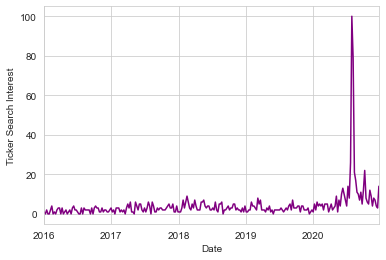

In [11]:
sPRPL['PRPL'].plot(color=('purple'))
plt.xlabel('Date')
plt.ylabel('Ticker Search Interest')

#### Concatinating the two dataframes into one:

In [12]:
dfPRPL = pd.concat([PRPL,sPRPL],axis=1)
dfTSLA = pd.concat([TSLA,sTSLA],axis=1)
dfGOOG = pd.concat([GOOG,sGOOG],axis=1)

#### Viewing new datatable:

In [13]:
dfPRPL.head()

,Open,High,Low,Close,Volume,Adj Close,PRPL,Purple Stock,Purple Stock Price
2016-01-03,9.62,9.79,9.56,9.66,10700,9.66,1,3,1
2016-01-10,9.66,9.70,9.56,9.56,778300,9.56,0,3,0
2016-01-17,9.56,9.71,9.56,9.71,5000,9.71,2,3,0
2016-01-24,9.70,10.00,9.70,9.82,2300,9.82,0,3,0
2016-01-31,9.82,9.82,9.82,9.82,0,9.82,0,7,0


In [14]:
dfPRPL['Return'] = dfPRPL['Adj Close'].pct_change()
dfPRPL['Absolute_Pct_Change'] = dfPRPL['Return'].abs()

dfTSLA['Return'] = dfTSLA['Adj Close'].pct_change()
dfTSLA['Absolute_Pct_Change'] = dfTSLA['Return'].abs()

dfGOOG['Return'] = dfGOOG['Adj Close'].pct_change()
dfGOOG['Absolute_Pct_Change'] = dfGOOG['Return'].abs()

dfPRPL = dfPRPL.dropna()
dfTSLA = dfTSLA.dropna()
dfGOOG = dfGOOG.dropna()

dfPRPL['Average_Search_Interest'] = ((dfPRPL['PRPL'] + dfPRPL['Purple Stock'] + dfPRPL['Purple Stock Price'])/3)
dfTSLA['Average_Search_Interest'] = ((dfTSLA['TSLA'] + dfTSLA['Tesla Stock'] + dfTSLA['Tesla Stock Price'])/3)
dfGOOG['Average_Search_Interest'] = ((dfGOOG['GOOG'] + dfGOOG['Google Stock'] + dfGOOG['Google Stock Price'])/3)

In [15]:
dfGOOG.head()

,Open,High,Low,Close,Volume,Adj Close,GOOG,Google Stock,Google Stock Price,Return,AbsolutePctChange,Average_Search_Interest
2016-01-10,716.609985,734.739990,685.369995,694.450012,12450700,694.450012,85,18,3,-0.028021,0.028021,35.333333
2016-01-17,703.299988,728.130005,673.260010,725.250000,10137100,725.250000,86,17,2,0.044352,0.044352,35.000000
2016-01-24,723.580017,744.989990,694.390015,742.950012,11388300,742.950012,90,18,3,0.024405,0.024405,37.000000
2016-01-31,750.460022,789.869995,680.150024,683.570007,27932700,683.570007,100,25,5,-0.079925,0.079925,43.333333
2016-02-07,667.849976,701.309998,663.059998,682.400024,15659700,682.400024,89,19,3,-0.001712,0.001712,37.000000


#### Viewing regression plots for % change and search interest:

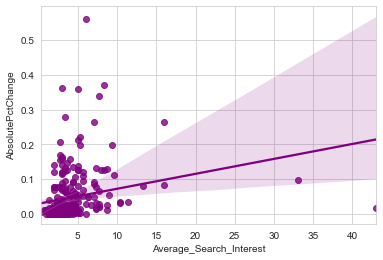

In [16]:
sns.regplot(x = dfPRPL['Average_Search_Interest'], y = dfPRPL['Absolute_Pct_Change'], color = 'purple')

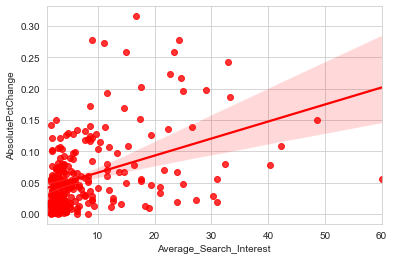

In [17]:
sns.regplot( x = dfTSLA['Average_Search_Interest'], y = dfTSLA['Absolute_Pct_Change'], color = 'red')

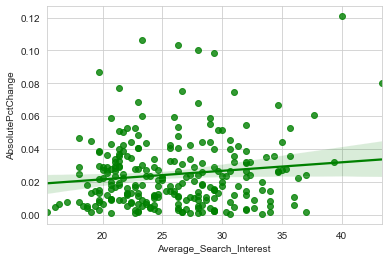

In [18]:
sns.regplot(x = dfGOOG['Average_Search_Interest'], y = dfGOOG['Absolute_Pct_Change'], color = 'green')

#### Viewing regression plots for trading volume and search interest

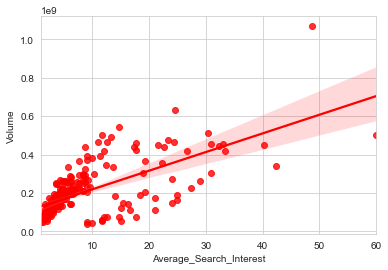

In [19]:
sns.regplot(x = dfTSLA['Average_Search_Interest'], y = dfTSLA['Volume'], color = 'red')

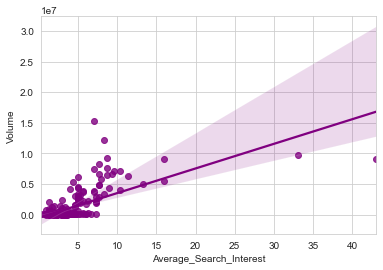

In [20]:
sns.regplot(x = dfPRPL['Average_Search_Interest'], y = dfPRPL['Volume'], color = 'purple')

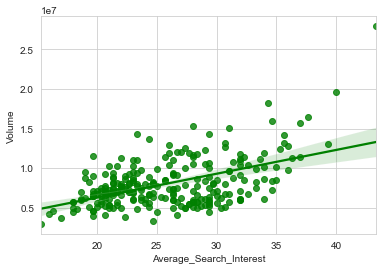

In [21]:
sns.regplot(x = dfGOOG['Average_Search_Interest'], y = dfGOOG['Volume'], color = 'green')

In [22]:
modelSPRPL = sm.ols('Absolute_Pct_Change ~ Average_Search_Interest',data=dfGOOG)
modelSPRPL = modelSPRPL.fit()

modelSTSLA = sm.ols('Absolute_Pct_Change ~ Average_Search_Interest',data=dfTSLA)
modelSTSLA = modelSTSLA.fit()

modelSGOOG = sm.ols('Absolute_Pct_Change ~ Average_Search_Interest',data=dfGOOG)
modelSGOOG = modelSGOOG.fit()

modelVPRPL = sm.ols('Volume ~ Average_Search_Interest',data=dfPRPL)
modelVPRPL = modelVPRPL.fit()

modelVTSLA = sm.ols('Volume ~ Average_Search_Interest',data=dfTSLA)
modelVTSLA = modelVTSLA.fit()

modelVGOOG = sm.ols('Volume ~ Average_Search_Interest',data=dfGOOG)
modelVGOOG = modelVGOOG.fit()

models = [modelSPRPL,modelSTSLA,modelSGOOG,modelVPRPL,modelVTSLA,modelVGOOG]

In [23]:
def displayRegression(model,Title):
    print(Title)
    print(model.params)
    print('R Squared:', model.rsquared)
    print()

In [24]:
displayRegression(modelSPRPL,'Absolute Percent Change and Search Interest: PRPL')
displayRegression(modelSTSLA,'Absolute Percent Change and Search Interest: TSLA')
displayRegression(modelSGOOG,'Absolute Percent Change and Search Interest: GOOG')
displayRegression(modelVPRPL,'Volume and Search Interest: PRPL')
displayRegression(modelVTSLA,'Volume and Search Interest: TSLA')
displayRegression(modelVGOOG,'Volume and Search Interest: GOOG')

Absolute Percent Change and Search Interest: PRPL
Intercept                  0.011089
Average_Search_Interest    0.000519
dtype: float64
R Squared: 0.01633413442764786

Absolute Percent Change and Search Interest: TSLA
Intercept                  0.038828
Average_Search_Interest    0.002719
dtype: float64
R Squared: 0.16735598476392632

Absolute Percent Change and Search Interest: GOOG
Intercept                  0.011089
Average_Search_Interest    0.000519
dtype: float64
R Squared: 0.01633413442764786

Volume and Search Interest: PRPL
Intercept                 -538113.962269
Average_Search_Interest    403013.844164
dtype: float64
R Squared: 0.44304988555199654

Volume and Search Interest: TSLA
Intercept                  1.214859e+08
Average_Search_Interest    9.705188e+06
dtype: float64
R Squared: 0.4525711487860693

Volume and Search Interest: GOOG
Intercept                  250026.665009
Average_Search_Interest    301034.653529
dtype: float64
R Squared: 0.2639899725142938

